<a href="https://colab.research.google.com/github/ryana-tammi/Predict-Customer-Personality-to-Boost-Marketing-Campaign-Using-Machine-Learning/blob/main/Source%20Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATA PREPROCESSING

In [ ]:
!pip install catboost
!pip install shap
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 6.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 6.7 MB/s 


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

#package Vizualiation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import shap

#package Pre-Processing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, balanced_accuracy_score
from sklearn.metrics import classification_report
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import OrdinalEncoder
from feature_engine.imputation import DropMissingData
from feature_engine.outliers import OutlierTrimmer
from imblearn import under_sampling, over_sampling
from feature_engine.imputation import MeanMedianImputer

#package Machine Learning Model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import silhouette_score
import xgboost as xgb
import catboost as cb

# google drive auth
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

sns.set_style('darkgrid')
sns.set(font_scale=1.3)

sns.set(rc={'figure.figsize': (20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 18, 6
rcParams['lines.linewidth'] = 1
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
#Import dataset
import pandas as pd
df = pd.read_csv('/content/gdrive/My Drive/Mini Project 3 EDA/marketing_campaign_data.csv')

In [ ]:
df1 = df.copy()
df1.head()

,Number,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
print('Data yang duplikat = ', df1.duplicated().sum())

Data yang duplikat =  0


In [ ]:
#Jumlah entry NULL di setiap kolom
df1.isna().sum().sort_values(ascending=False)

Income                 24
Number                  0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
ID                      0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntCoke                 0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Year_Birth              0
Response                0
dtype: int64

In [ ]:
percentage_of_null_values = ((df1.isnull().sum())*100/len(df1)).sort_values(ascending = False)
percentage_of_null_values

Income                 1.071429
Number                 0.000000
NumDealsPurchases      0.000000
Z_Revenue              0.000000
Z_CostContact          0.000000
Complain               0.000000
AcceptedCmp2           0.000000
AcceptedCmp1           0.000000
AcceptedCmp5           0.000000
AcceptedCmp4           0.000000
AcceptedCmp3           0.000000
NumWebVisitsMonth      0.000000
NumStorePurchases      0.000000
NumCatalogPurchases    0.000000
NumWebPurchases        0.000000
MntGoldProds           0.000000
ID                     0.000000
MntSweetProducts       0.000000
MntFishProducts        0.000000
MntMeatProducts        0.000000
MntFruits              0.000000
MntCoke                0.000000
Recency                0.000000
Dt_Customer            0.000000
Teenhome               0.000000
Kidhome                0.000000
Marital_Status         0.000000
Education              0.000000
Year_Birth             0.000000
Response               0.000000
dtype: float64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Number               2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [ ]:
#Pengelompokan kolom berdasarkan jenisnya
nums = ['ID','Year_Birth','Income','Kidhome','Teenhome','Recency','MntCoke','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts',
        'MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',
        'AcceptedCmp1','AcceptedCmp2','Complain','Z_CostContact','Z_Revenue','Response']
cats = ['Education','Marital_Status','Dt_Customer']

In [ ]:
df1[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5.592160e+03,3.246662e+03,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1.968806e+03,1.198407e+01,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,5.224725e+07,2.517308e+07,1730000.0,35303000.00,51381500.0,68522000.00,666666000.0
Kidhome,2240.0,4.441964e-01,5.383981e-01,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,5.062500e-01,5.445382e-01,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,4.910938e+01,2.896245e+01,0.0,24.00,49.0,74.00,99.0
MntCoke,2240.0,3.039357e+05,3.365974e+05,0.0,23750.00,173500.0,504250.00,1493000.0
MntFruits,2240.0,2.630223e+04,3.977343e+04,0.0,1000.00,8000.0,33000.00,199000.0
MntMeatProducts,2240.0,1.669500e+05,2.257154e+05,0.0,16000.00,67000.0,232000.00,1725000.0
MntFishProducts,2240.0,3.752545e+04,5.462898e+04,0.0,3000.00,12000.0,50000.00,259000.0


In [ ]:
df1[cats].describe().transpose()

,count,unique,top,freq
Education,2240,5,S1,1127
Marital_Status,2240,6,Menikah,864
Dt_Customer,2240,663,31-08-2012,12


In [ ]:
#missing value kolom `Income` diisi dengan mean,karena pada deskriptif statistiknya mean<median. 
df1['Income'].fillna(df1['Income'].mean(), inplace=True)

In [ ]:
# cek jumlah missing data setelah preprocessing
df1.isna().sum()

Number                 0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Number               2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2240 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

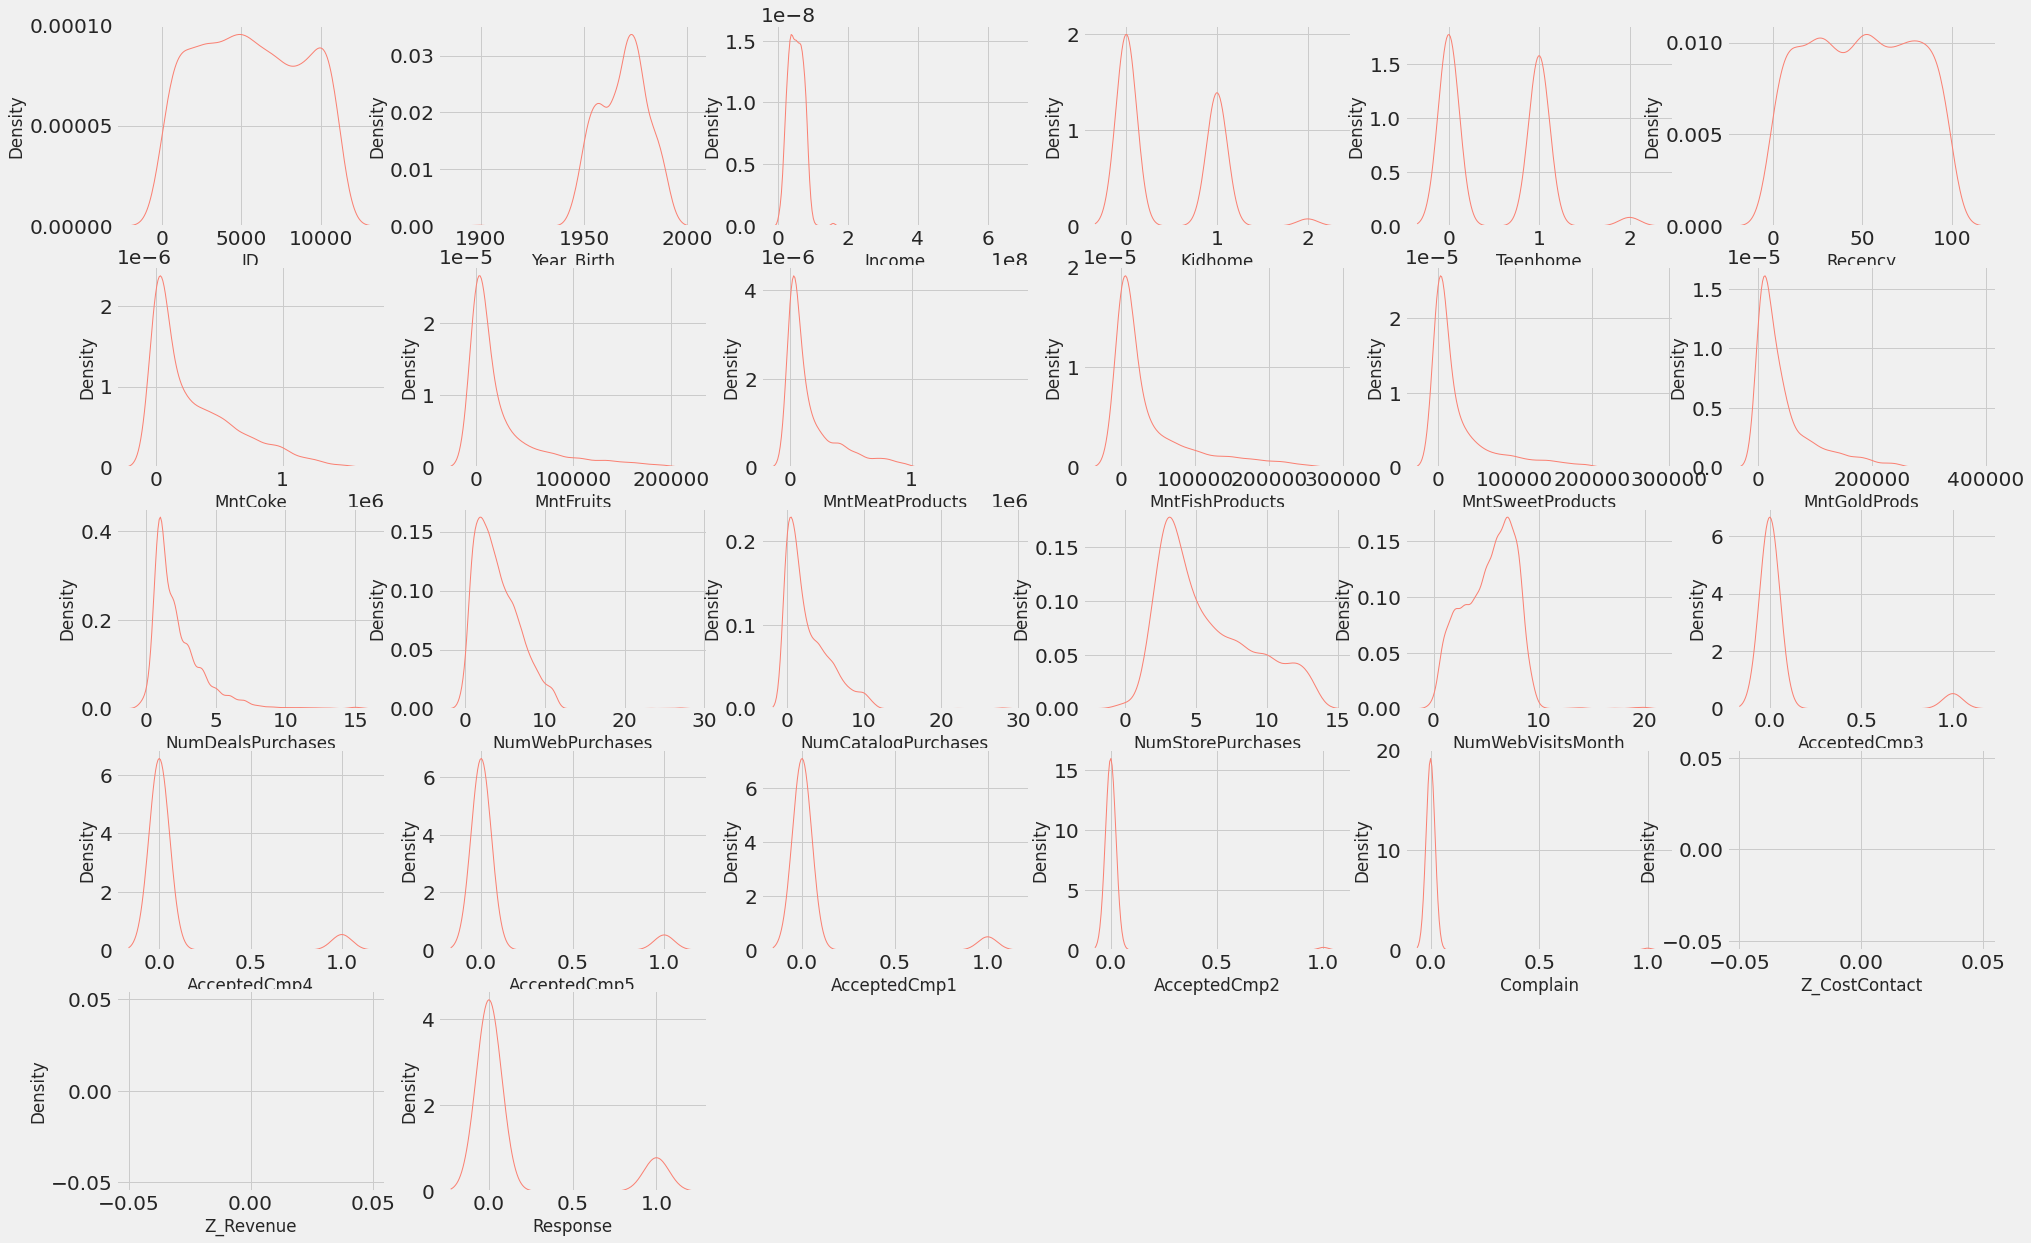

In [ ]:
features = nums
plt.figure(figsize=(30, 20))
for i in range(0, len(features)):
    plt.subplot(5, 6, i+1)
    sns.kdeplot(x=df1[features[i]], color='salmon')
    plt.xlabel(features[i]);

In [ ]:
df1['Dt_Customer'].value_counts()

31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
25-05-2013     1
14-04-2013     1
09-01-2014     1
Name: Dt_Customer, Length: 663, dtype: int64

In [ ]:
#Buat kolom 'Umur'
df1['Umur'] = 2022 - df1['Year_Birth']
df1['Umur'].describe()

count    2240.000000
mean       53.194196
std        11.984069
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max       129.000000
Name: Umur, dtype: float64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Number               2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2240 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

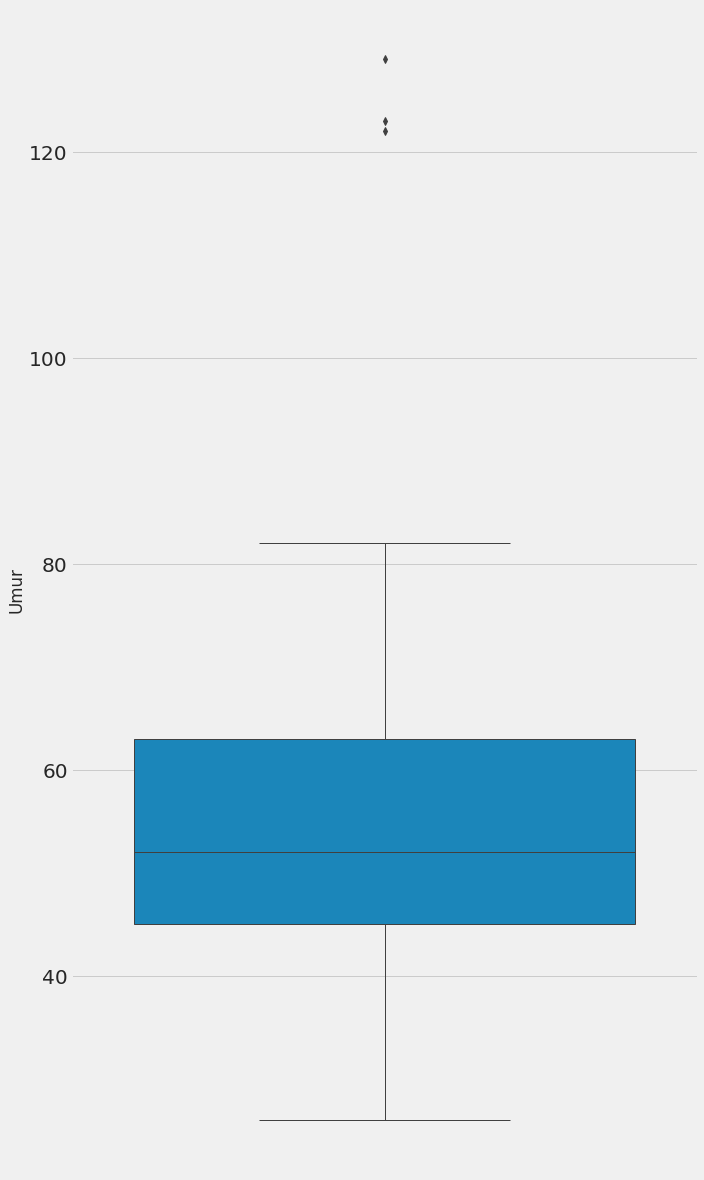

In [ ]:
plt.figure(figsize=(10,20))
sns.boxplot(y=df1['Umur'], orient='v')

In [ ]:
df1['Umur'].describe().transpose()

count    2240.000000
mean       53.194196
std        11.984069
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max       129.000000
Name: Umur, dtype: float64

In [ ]:
#Membuat kolom baru untuk pengelompokan umur 'Kelompok_Umur'

kelompok = []

for i, kolom in df1.iterrows():
    if kolom ['Umur'] <= 30: 
        result = 'Dewasa Muda'
    elif kolom ['Umur'] >30 and kolom ['Umur'] <=60 : 
        result = 'Dewasa'
    else :
        result = 'Lansia'
    kelompok.append(result)
df1['Kelompok_Umur'] = kelompok
df1['Kelompok_Umur'].value_counts()

Dewasa         1557
Lansia          655
Dewasa Muda      28
Name: Kelompok_Umur, dtype: int64

In [ ]:
#Cara Lain untuk buat kelompok Umur
col         = 'Umur'
conditions  = [ df1[col] <= 30, (df1[col] > 30) & (df1[col] <= 60), df1[col] > 60]
choices     = [ 'Dewasa Muda', 'Dewasa', 'Lansia' ]
    
#df1["KelompokUmur"] = np.select(conditions, choices, default=np.nan)
#df1['KelompokUmur'].value_counts()

In [ ]:
df1['Teenhome'].describe()

count    2240.000000
mean        0.506250
std         0.544538
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Teenhome, dtype: float64

In [ ]:
df1['Kidhome'].describe()

count    2240.000000
mean        0.444196
std         0.538398
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Kidhome, dtype: float64

In [ ]:
#Membuat kolom 'Anak'
df1['Anak'] = df1['Kidhome'] + df1['Teenhome']
df1['Anak'].describe() #Periksa jumlah anak

count    2240.000000
mean        0.950446
std         0.751803
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Anak, dtype: float64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Number               2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2240 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [ ]:
#Membuat 'Kelompok_Anak'
col         = 'Anak'
conditions  = [ df1[col] < 1, (df1[col] >= 1) & (df1[col] <= 2), df1[col] > 2]
choices     = [ 'Tanpa Anak', '1 & 2 Anak', '>2 Anak' ]
    
df1["Kelompok_Anak"] = np.select(conditions, choices, default=np.nan)
df1['Kelompok_Anak'].value_counts()

1 & 2 Anak    1549
Tanpa Anak     638
>2 Anak         53
Name: Kelompok_Anak, dtype: int64

In [ ]:
#Buat kolom baru 'Conversion_Rate%'
df_CR = df1.groupby(['Kelompok_Umur','Kelompok_Anak']).agg({'ID' : 'count', 'Income' :'sum', 
                              'NumWebVisitsMonth' : 'sum', 'NumWebPurchases' : 'sum' })
df_CR['Conversion_Rate%'] = (df_CR['NumWebPurchases']/df_CR['NumWebVisitsMonth'])*100
df_CR['Income x10^9'] = df_CR['Income']/1000000000
df_CR = df_CR.reset_index()
df_CR = df_CR.rename(columns = {'ID' : 'Jumlah Customer'})
df_CR

,Kelompok_Umur,Kelompok_Anak,Jumlah Customer,Income,NumWebVisitsMonth,NumWebPurchases,Conversion_Rate%,Income x10^9
0,Dewasa,1 & 2 Anak,1145,5.151924e+10,7112,4357,61.262655,51.519239
1,Dewasa,>2 Anak,30,1.343961e+09,196,72,36.734694,1.343961
2,Dewasa,Tanpa Anak,382,2.484571e+10,1356,1654,121.976401,24.845710
3,Dewasa Muda,1 & 2 Anak,4,5.875500e+07,30,9,30.000000,0.058755
4,Dewasa Muda,Tanpa Anak,24,1.516690e+09,91,87,95.604396,1.516690
5,Lansia,1 & 2 Anak,400,2.111240e+10,2207,1829,82.872678,21.112398
6,Lansia,>2 Anak,23,1.146631e+09,146,80,54.794521,1.146631
7,Lansia,Tanpa Anak,232,1.549046e+10,771,1062,137.743191,15.490460


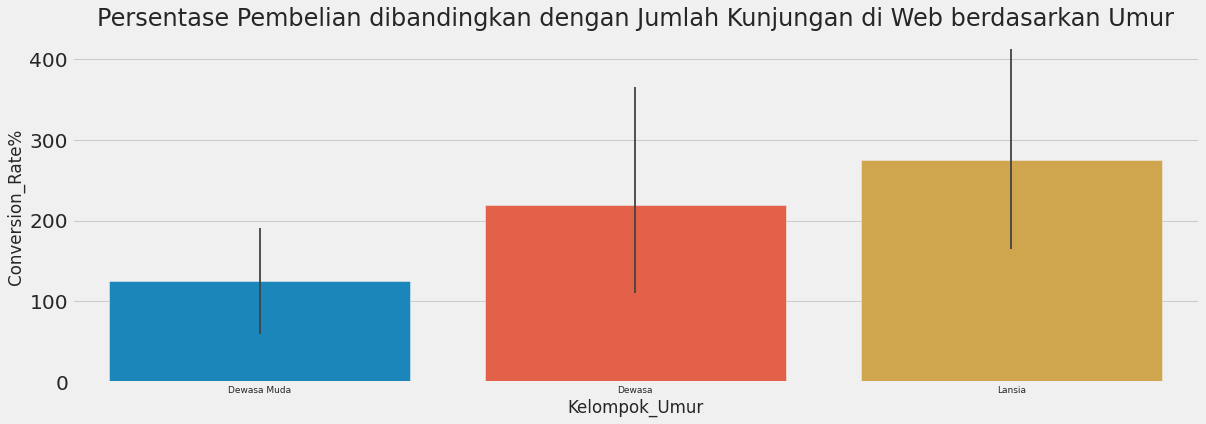

In [ ]:
sns.barplot(x= 'Kelompok_Umur', y='Conversion_Rate%', data = df_CR.sort_values(['Conversion_Rate%'], ascending = True), estimator=sum)
plt.title('Persentase Pembelian dibandingkan dengan Jumlah Kunjungan di Web berdasarkan Umur', size = 24)
plt.xticks(fontsize=9);

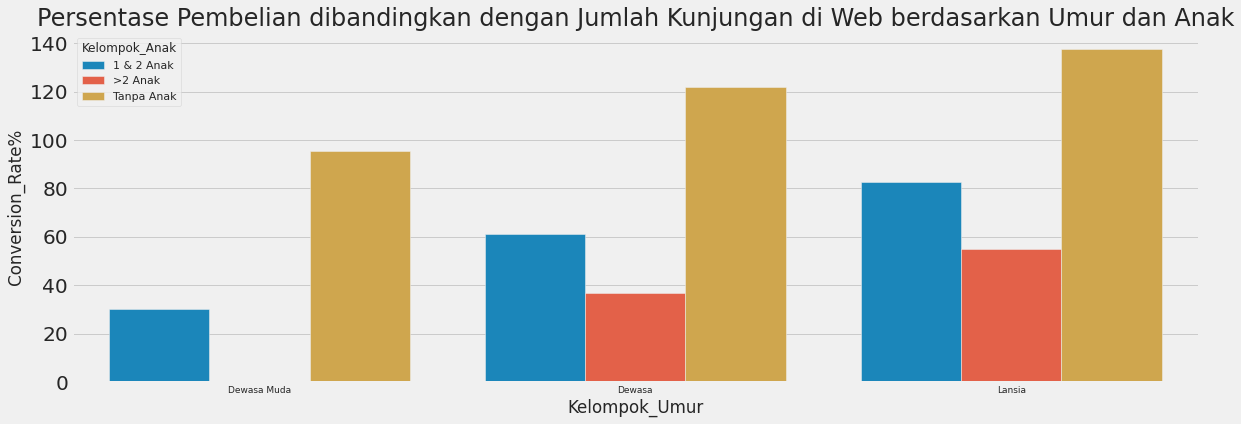

In [ ]:
sns.barplot(x= 'Kelompok_Umur', y='Conversion_Rate%', hue = 'Kelompok_Anak', data = df_CR.sort_values(['Conversion_Rate%'], ascending = True), estimator=sum)
plt.title('Persentase Pembelian dibandingkan dengan Jumlah Kunjungan di Web berdasarkan Umur dan Anak', size = 24)
plt.xticks(fontsize=9);

In [ ]:
df1['Income'].describe()

count    2.240000e+03
mean     5.224725e+07
std      2.503780e+07
min      1.730000e+06
25%      3.553875e+07
50%      5.174150e+07
75%      6.828975e+07
max      6.666660e+08
Name: Income, dtype: float64

In [ ]:
#Membuat 'Kelompok_Pendapatan'
col         = 'Income'
conditions  = [ df1[col] < 3.0e+07, (df1[col] >= 3.0e+07) & (df1[col] <= 5.0e+07), df1[col] > 5.0e+07]
choices     = [ 'Pendapatan Rendah', 'Pendapatan Menengah', 'Pendapatan Tinggi' ]
    
df1["Kelompok_Pendapatan"] = np.select(conditions, choices, default=np.nan)
df1['Kelompok_Pendapatan'].value_counts()

Pendapatan Tinggi      1180
Pendapatan Menengah     690
Pendapatan Rendah       370
Name: Kelompok_Pendapatan, dtype: int64

In [ ]:
#Buat kolom baru 'Conversion_Rate%'
df_CR1 = df1.groupby('Kelompok_Pendapatan').agg({'ID' : 'count',
                              'NumWebVisitsMonth' : 'sum', 'NumWebPurchases' : 'sum' })
df_CR1['Conversion_Rate%'] = (df_CR1['NumWebPurchases']/df_CR1['NumWebVisitsMonth'])*100
df_CR1 = df_CR1.reset_index()
df_CR1 = df_CR1.rename(columns = {'ID' : 'Jumlah Customer'})
df_CR1

,Kelompok_Pendapatan,Jumlah Customer,NumWebVisitsMonth,NumWebPurchases,Conversion_Rate%
0,Pendapatan Menengah,690,4472,2056,45.974955
1,Pendapatan Rendah,370,2637,723,27.417520
2,Pendapatan Tinggi,1180,4800,6371,132.729167


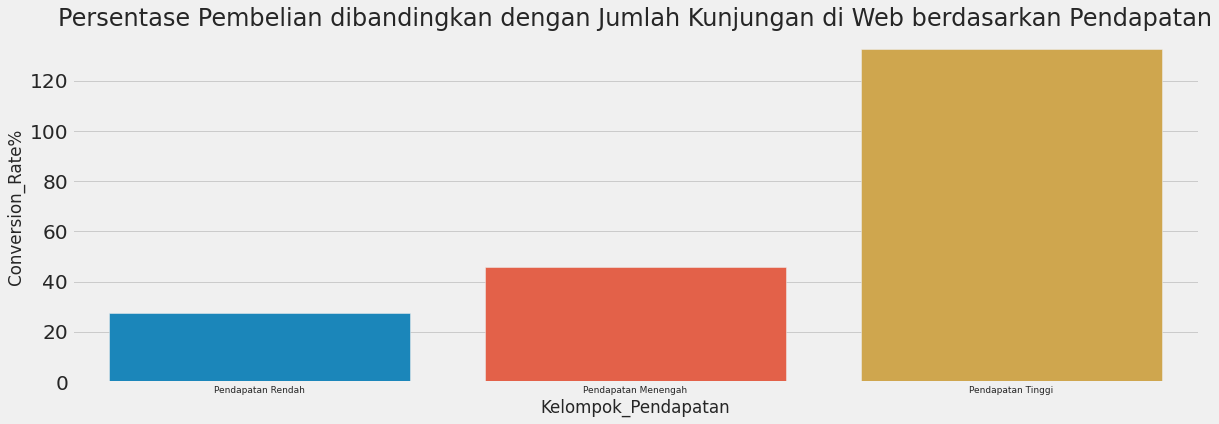

In [ ]:
sns.barplot(x= 'Kelompok_Pendapatan', y='Conversion_Rate%', data = df_CR1.sort_values(['Conversion_Rate%'], ascending = True), estimator=sum)
plt.title('Persentase Pembelian dibandingkan dengan Jumlah Kunjungan di Web berdasarkan Pendapatan', size = 24)
plt.xticks(fontsize=9);

In [ ]:
df1['Response'].describe()

count    2240.000000
mean        0.149107
std         0.356274
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Response, dtype: float64

In [ ]:
#Membuat kolom 'Total pengeluaran'
# Create List of columns
col_list= ['MntCoke','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
# sum specific columns
df1['Total_Pengeluaran'] = df[col_list].sum(axis=1)
df1['Total_Pengeluaran'].describe()

count    2.240000e+03
mean     6.057982e+05
std      6.022493e+05
min      5.000000e+03
25%      6.875000e+04
50%      3.960000e+05
75%      1.045500e+06
max      2.525000e+06
Name: Total_Pengeluaran, dtype: float64

In [ ]:
#Membuat 'Kelompok_Total_Pengeluaran'
col         = 'Total_Pengeluaran'
conditions  = [ df1[col] < 6.0e+04, (df1[col] >= 6.0e+04) & (df1[col] <= 1.0e+06), df1[col] > 1.0e+06]
choices     = [ 'Bronze', 'Silver', 'Gold' ]
    
df1["Kelompok_Total_Pengeluaran"] = np.select(conditions, choices, default=np.nan)
df1['Kelompok_Total_Pengeluaran'].value_counts()

Silver    1155
Gold       602
Bronze     483
Name: Kelompok_Total_Pengeluaran, dtype: int64

In [ ]:
#Buat kolom baru 'Conversion_Rate%'
df_CR2 = df1.groupby('Kelompok_Total_Pengeluaran').agg({'ID' : 'count',
                              'NumWebVisitsMonth' : 'sum', 'NumWebPurchases' : 'sum' })
df_CR2['Conversion_Rate%'] = (df_CR2['NumWebPurchases']/df_CR2['NumWebVisitsMonth'])*100
df_CR2 = df_CR2.reset_index()
df_CR2 = df_CR2.rename(columns = {'ID' : 'Jumlah Customer'})
df_CR2

,Kelompok_Total_Pengeluaran,Jumlah Customer,NumWebVisitsMonth,NumWebPurchases,Conversion_Rate%
0,Bronze,483,3151,618,19.612821
1,Gold,602,2176,3380,155.330882
2,Silver,1155,6582,5152,78.274081


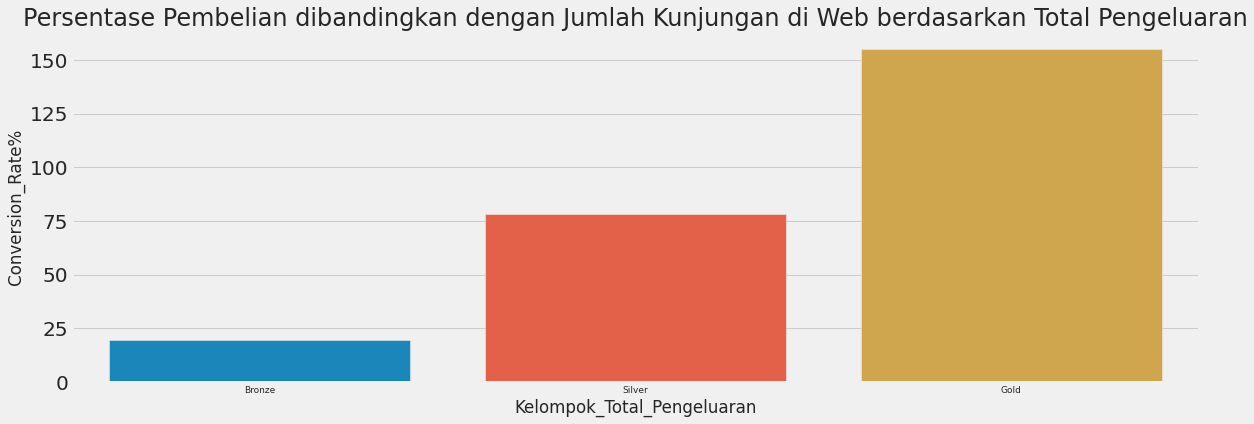

In [ ]:
sns.barplot(x= 'Kelompok_Total_Pengeluaran', y='Conversion_Rate%', data = df_CR2.sort_values(['Conversion_Rate%'], ascending = True), estimator=sum)
plt.title('Persentase Pembelian dibandingkan dengan Jumlah Kunjungan di Web berdasarkan Total Pengeluaran', size = 24)
plt.xticks(fontsize=9);

In [ ]:
#Membuat kolom 'Total Transaksi'
# Create List of columns
col_list= ['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']
# sum specific columns
df1['Total_Transaksi'] = df[col_list].sum(axis=1)
df1['Total_Transaksi'].describe()

count    2240.000000
mean       14.862054
std         7.677173
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: Total_Transaksi, dtype: float64

In [ ]:
#Buat kolom baru 'Conversion_Rate%'
df_CR3 = df1.groupby(['Kelompok_Umur']).agg({'ID' : 'count', 'Total_Transaksi': 'sum'})
df_CR3 = df_CR3.rename(columns = {'ID' : 'Jumlah Customer'})
df_CR3 = df_CR3.reset_index()
df_CR3

,Kelompok_Umur,Jumlah Customer,Total_Transaksi
0,Dewasa,1557,22052
1,Dewasa Muda,28,414
2,Lansia,655,10825


In [ ]:
#Total = df_CR3['Total_Transaksi'].sum()
#print(Total)

In [ ]:
df_CR3['Total_Transaksi%'] = (df_CR3['Total_Transaksi']/(df_CR3['Total_Transaksi'].sum(axis=0)))*100
df_CR3

,Kelompok_Umur,Jumlah Customer,Total_Transaksi,Total_Transaksi%
0,Dewasa,1557,22052,66.240125
1,Dewasa Muda,28,414,1.243579
2,Lansia,655,10825,32.516296


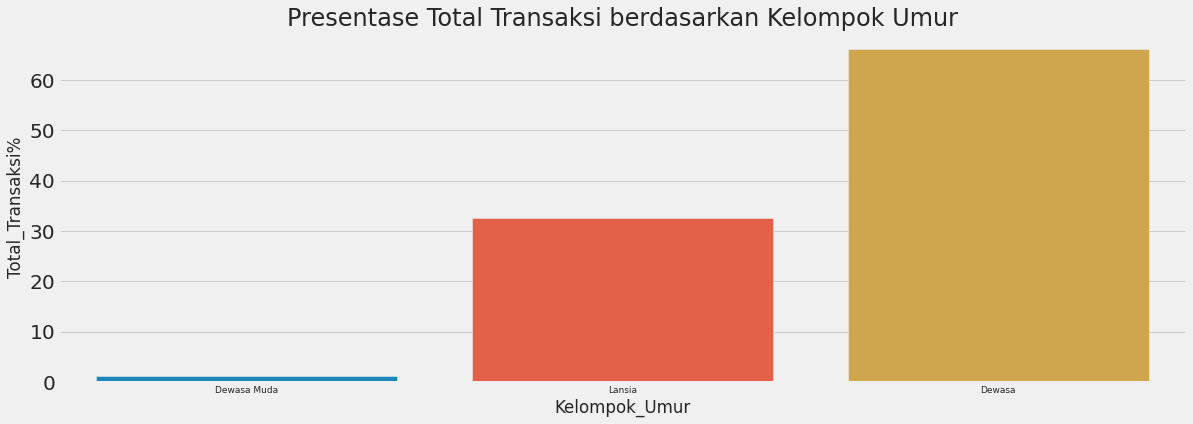

In [ ]:
sns.barplot(x= 'Kelompok_Umur', y='Total_Transaksi%', data = df_CR3.sort_values(['Total_Transaksi%'], ascending = True), estimator=sum)
plt.title('Presentase Total Transaksi berdasarkan Kelompok Umur', size = 24)
plt.xticks(fontsize=9);

#Data Cleaning & Preprocessing

In [ ]:
df2 = df1.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Number                      2240 non-null   int64  
 1   ID                          2240 non-null   int64  
 2   Year_Birth                  2240 non-null   int64  
 3   Education                   2240 non-null   object 
 4   Marital_Status              2240 non-null   object 
 5   Income                      2240 non-null   float64
 6   Kidhome                     2240 non-null   int64  
 7   Teenhome                    2240 non-null   int64  
 8   Dt_Customer                 2240 non-null   object 
 9   Recency                     2240 non-null   int64  
 10  MntCoke                     2240 non-null   int64  
 11  MntFruits                   2240 non-null   int64  
 12  MntMeatProducts             2240 non-null   int64  
 13  MntFishProducts             2240 

In [ ]:
# Drop kolom yang telah diubah/handling
df2.drop(['Kidhome', 'Teenhome','Year_Birth'], axis=1, inplace=True)
df2.head(5)

,Number,ID,Education,Marital_Status,Income,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,...,Z_Revenue,Response,Umur,Kelompok_Umur,Anak,Kelompok_Anak,Kelompok_Pendapatan,Total_Pengeluaran,Kelompok_Total_Pengeluaran,Total_Transaksi
0,0,5524,S1,Lajang,58138000.0,04-09-2012,58,635000,88000,546000,...,11,1,65,Lansia,0,Tanpa Anak,Pendapatan Tinggi,1617000,Gold,25
1,1,2174,S1,Lajang,46344000.0,08-03-2014,38,11000,1000,6000,...,11,0,68,Lansia,2,1 & 2 Anak,Pendapatan Menengah,27000,Bronze,6
2,2,4141,S1,Bertunangan,71613000.0,21-08-2013,26,426000,49000,127000,...,11,0,57,Dewasa,0,Tanpa Anak,Pendapatan Tinggi,776000,Silver,21
3,3,6182,S1,Bertunangan,26646000.0,10-02-2014,26,11000,4000,20000,...,11,0,38,Dewasa,1,1 & 2 Anak,Pendapatan Rendah,53000,Bronze,8
4,4,5324,S3,Menikah,58293000.0,19-01-2014,94,173000,43000,118000,...,11,0,41,Dewasa,1,1 & 2 Anak,Pendapatan Tinggi,422000,Silver,19


In [ ]:
#Pengelompokan kolom berdasarkan jenisnya
nums = ['ID','Income','Dt_Customer','Recency','MntCoke','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts',
        'MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',
        'AcceptedCmp1','AcceptedCmp2','Complain','Z_CostContact','Z_Revenue','Response', 'Umur', 'Anak', 'Total_Transaksi',  'Total_Pengeluaran']
cats = ['Education','Marital_Status', 'Kelompok_Umur', 'Kelompok_Anak', 'Kelompok_Pendapatan', 'Kelompok_Total_Pengeluaran']

In [ ]:
df2[cats].describe()

,Education,Marital_Status,Kelompok_Umur,Kelompok_Anak,Kelompok_Pendapatan,Kelompok_Total_Pengeluaran
count,2240,2240,2240,2240,2240,2240
unique,5,6,3,3,3,3
top,S1,Menikah,Dewasa,1 & 2 Anak,Pendapatan Tinggi,Silver
freq,1127,864,1557,1549,1180,1155


In [ ]:
df2['Marital_Status'].value_counts()

Menikah        864
Bertunangan    580
Lajang         484
Cerai          232
Janda           77
Duda             3
Name: Marital_Status, dtype: int64

In [ ]:
#OneHot Encoding untuk data categorical
for cats in ['Education','Marital_Status', 'Kelompok_Umur', 'Kelompok_Anak', 'Kelompok_Pendapatan', 'Kelompok_Total_Pengeluaran']:
    onehots = pd.get_dummies(df2[cats], prefix=cats)
    df2 = df2.join(onehots)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 58 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Number                                   2240 non-null   int64  
 1   ID                                       2240 non-null   int64  
 2   Education                                2240 non-null   object 
 3   Marital_Status                           2240 non-null   object 
 4   Income                                   2240 non-null   float64
 5   Dt_Customer                              2240 non-null   object 
 6   Recency                                  2240 non-null   int64  
 7   MntCoke                                  2240 non-null   int64  
 8   MntFruits                                2240 non-null   int64  
 9   MntMeatProducts                          2240 non-null   int64  
 10  MntFishProducts                          2240 no

#Data Modeling

In [ ]:
df3 = df2.copy()

In [ ]:
# Handling Accepted Campaign
df3['Acc_Cmp'] = df3['AcceptedCmp1']+df3['AcceptedCmp2']+df3['AcceptedCmp3']+df3['AcceptedCmp4']+df3['AcceptedCmp5']

# Drop kolom yang telah diubah/handling
df3.drop(['Number', 'ID', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Education','Marital_Status', 'Kelompok_Umur', 'Kelompok_Anak', 'Kelompok_Pendapatan', 'Kelompok_Total_Pengeluaran'], axis=1, inplace=True)
df3.sample(5)

,Income,Dt_Customer,Recency,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Umur,Anak,...,Kelompok_Anak_1 & 2 Anak,Kelompok_Anak_>2 Anak,Kelompok_Anak_Tanpa Anak,Kelompok_Pendapatan_Pendapatan Menengah,Kelompok_Pendapatan_Pendapatan Rendah,Kelompok_Pendapatan_Pendapatan Tinggi,Kelompok_Total_Pengeluaran_Bronze,Kelompok_Total_Pengeluaran_Gold,Kelompok_Total_Pengeluaran_Silver,Acc_Cmp
882,36627000.0,23-07-2013,78,5,0,3,11,0,47,2,...,1,0,0,1,0,0,1,0,0,0
1726,42586000.0,29-10-2012,7,8,0,3,11,1,67,2,...,1,0,0,1,0,0,0,0,1,0
1524,3502000.0,13-04-2013,56,14,0,3,11,0,49,1,...,1,0,0,0,1,0,1,0,0,0
2051,55801000.0,22-09-2013,35,7,0,3,11,0,47,2,...,1,0,0,0,0,1,0,0,1,1
1104,30023000.0,24-03-2014,28,8,0,3,11,0,50,1,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
#Standarisasi
for i in ['Income', 'Total_Transaksi', 'Total_Pengeluaran']:
    df3[i] = StandardScaler().fit_transform(df3[i].values.reshape(len(df3), 1))

df3.describe()

,Income,Recency,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Umur,Anak,Total_Pengeluaran,...,Kelompok_Anak_1 & 2 Anak,Kelompok_Anak_>2 Anak,Kelompok_Anak_Tanpa Anak,Kelompok_Pendapatan_Pendapatan Menengah,Kelompok_Pendapatan_Pendapatan Rendah,Kelompok_Pendapatan_Pendapatan Tinggi,Kelompok_Total_Pengeluaran_Bronze,Kelompok_Total_Pengeluaran_Gold,Kelompok_Total_Pengeluaran_Silver,Acc_Cmp
count,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2.240000e+03,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1.078502e-16,49.109375,5.316518,0.009375,3.0,11.0,0.149107,53.194196,0.950446,-6.502735e-17,...,0.691518,0.023661,0.284821,0.308036,0.165179,0.526786,0.215625,0.268750,0.515625,0.297768
std,1.000223e+00,28.962453,2.426645,0.096391,0.0,0.0,0.356274,11.984069,0.751803,1.000223e+00,...,0.461970,0.152024,0.451430,0.461784,0.371425,0.499393,0.411347,0.443409,0.499867,0.678381
min,-2.018090e+00,0.000000,0.000000,0.000000,3.0,11.0,0.000000,26.000000,0.000000,-9.978133e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.674801e-01,24.000000,3.000000,0.000000,3.0,11.0,0.000000,45.000000,0.000000,-8.919365e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.020403e-02,49.000000,6.000000,0.000000,3.0,11.0,0.000000,52.000000,1.000000,-3.484355e-01,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,6.408743e-01,74.000000,7.000000,0.000000,3.0,11.0,0.000000,63.000000,1.000000,7.302623e-01,...,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,2.454513e+01,99.000000,20.000000,1.000000,3.0,11.0,1.000000,129.000000,3.000000,3.187435e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [ ]:
for i in ['Income', 'Total_Transaksi', 'Total_Pengeluaran']:
    df3[i] = MinMaxScaler().fit_transform(df3[i].values.reshape(len(df3), 1))

df.describe()

,Number,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1119.500000,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,646.776623,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,559.750000,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1119.500000,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1679.250000,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,2239.000000,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
df31=df3[['Income', 'Total_Transaksi', 'Total_Pengeluaran']]

[59.86599378912273, 35.107961583857474, 25.025887801927738, 20.098277142957187, 16.66708019986985, 14.070481959402628, 12.23998543222493, 10.939214218196035, 9.803123187152078]


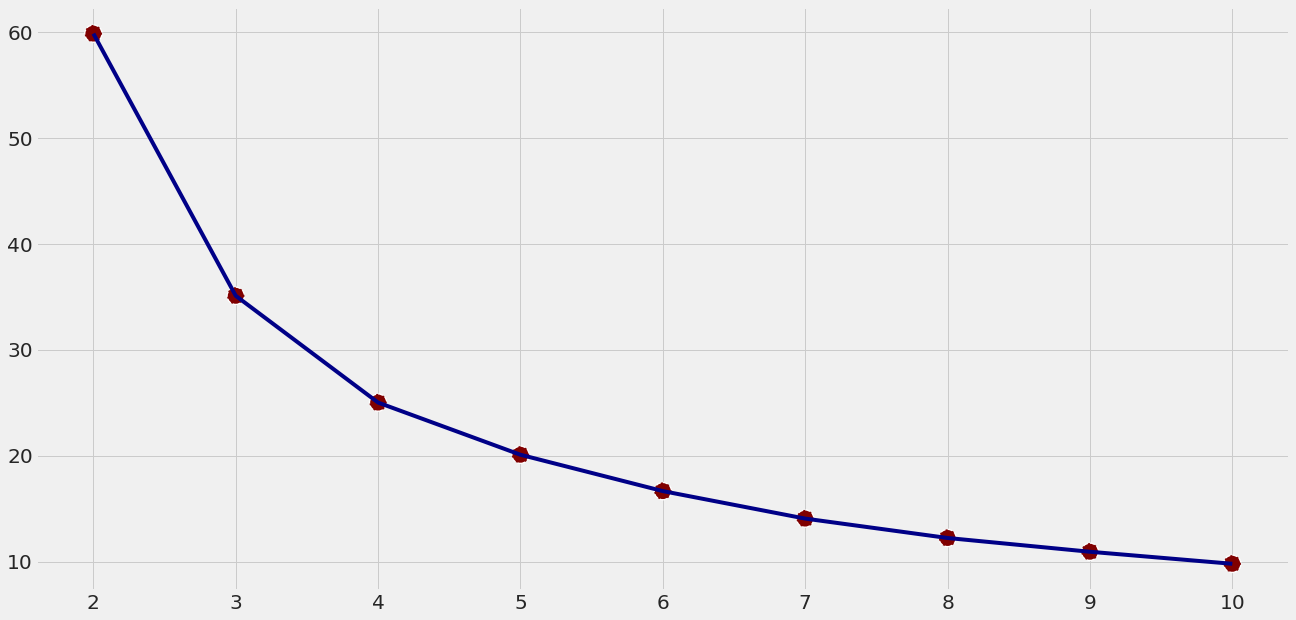

In [ ]:
#K-Means
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=45)
    kmeans.fit(df31.values)
    inertia.append(kmeans.inertia_)


print(inertia)

plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--');

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=198)
kmeans.fit(df31.values)

KMeans(n_clusters=4, random_state=198)

In [ ]:
df31['cluster'] = kmeans.labels_
df31.sample(5)

,Income,Total_Transaksi,Total_Pengeluaran,cluster
20,0.053103,0.272727,0.123413,2
519,0.117987,0.454545,0.752778,1
1499,0.100396,0.681818,0.540079,3
17,0.054186,0.295455,0.123810,2
2178,0.076976,0.340909,0.226190,2


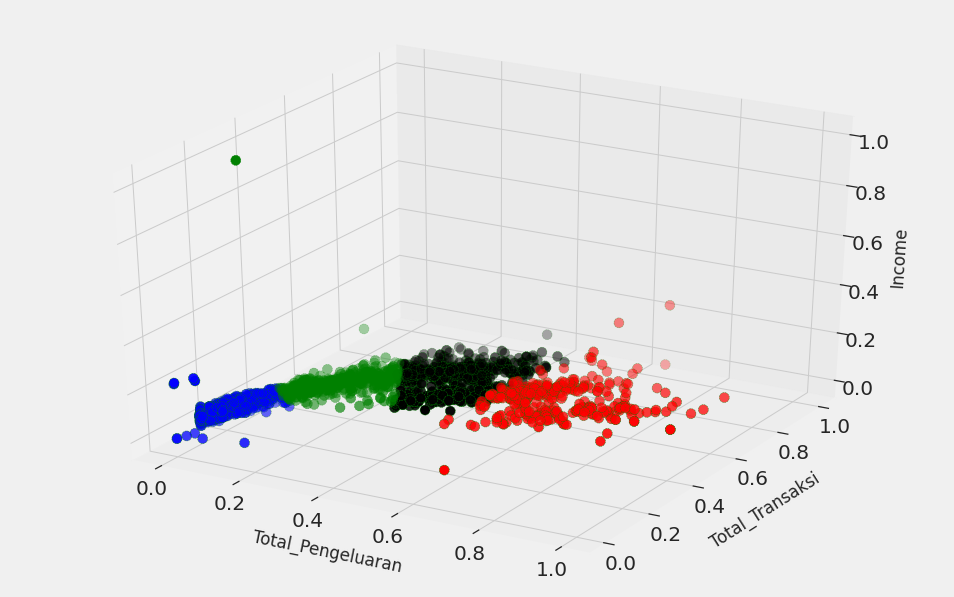

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df31.Total_Pengeluaran[df31.cluster == 0], df31["Total_Transaksi"][df31.cluster == 0], df31["Income"][df31.cluster == 0], c='blue', s=100, edgecolor='green',linestyle='--')
ax.scatter(df31.Total_Pengeluaran[df31.cluster == 1], df31["Total_Transaksi"][df31.cluster == 1], df31["Income"][df31.cluster == 1], c='red', s=100, edgecolor='green',linestyle='--')
ax.scatter(df31.Total_Pengeluaran[df31.cluster == 2], df31["Total_Transaksi"][df31.cluster == 2], df31["Income"][df31.cluster == 2], c='green', s=100, edgecolor='green',linestyle='--')
ax.scatter(df31.Total_Pengeluaran[df31.cluster == 3], df31["Total_Transaksi"][df31.cluster == 3], df31["Income"][df31.cluster == 3], c='black', s=100, edgecolor='green',linestyle='--')


plt.xlabel("Total_Pengeluaran", labelpad=20)
plt.ylabel("Total_Transaksi", labelpad=20)
ax.set_zlabel('Income', labelpad=10)
plt.show()

In [ ]:
display(df31.groupby('cluster').agg(['mean','median']))

Income           Total_Transaksi           Total_Pengeluaran  \
             mean    median            mean    median              mean   
cluster                                                                   
0        0.049104  0.048173        0.165159  0.159091          0.029208   
1        0.115439  0.115668        0.485374  0.477273          0.679411   
2        0.078679  0.075246        0.393130  0.386364          0.177245   
3        0.098621  0.097833        0.515238  0.522727          0.403009   

                   
           median  
cluster            
0        0.021429  
1        0.657540  
2        0.170238  
3        0.403770

In [ ]:
KMean= KMeans(n_clusters=4)
KMean.fit(df31)
label=KMean.predict(df31)

In [ ]:
print(f'Silhouette Score(n=2): {silhouette_score(df31, label)}')

Silhouette Score(n=2): 0.8905950367658053


#Rekomendasi Business

Berdasarkan hasil analisis di atas terhadap Income yang mempengaruhi spending, maka tim marketing bisa membuat campaign promo diskon atau cashback terhadap produk brand kelas atas.
Tim marketing juga bisa membuat campain flash sale untuk meningkatkan jumlah transactions user.